## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
base_path = r'..\Dataset'

gen_path_normal = os.path.join(base_path, r'Generated\normal.npy')
gen_path_patient = os.path.join(base_path, r'Generated\patient.npy')

real_path_normal = os.path.join(base_path, r'Real\normal_cls.npy')
real_path_patient = os.path.join(base_path, r'Real\patient_cls.npy')

gen_path_normal,gen_path_patient,real_path_normal,real_path_patient,

('..\\Dataset\\Generated\\normal.npy',
 '..\\Dataset\\Generated\\patient.npy',
 '..\\Dataset\\Real\\normal_cls.npy',
 '..\\Dataset\\Real\\patient_cls.npy')

In [3]:
def higuchi_fd(sig, kmax):
    """
    Compute Higuchi Fractal Dimension of a time series.

    Parameters:
        sig : numpy array
            1-D real-valued time series signal.
        kmax : int
            Maximum delay value.

    Returns:
        float
            Higuchi Fractal Dimension.
    """
    n = len(sig)
    k_vals = np.arange(1, kmax + 1)
    lk = np.zeros(kmax)
    for k in k_vals:
        lm_sum = 0
        for m in range(k):
            num_windows = int(np.floor((n - m) / k))
            temp_sum = 0
            for i in range(num_windows):
                start_index = i * k + m
                end_index = start_index + k
                temp_sum += np.abs(sig[start_index:end_index].mean())
            lm_sum += (1 / (num_windows * k)) * temp_sum
        lk[k - 1] = (lm_sum * (n / k)**2) / ((n - 1) / k)
    return np.log(lk).sum() / np.log(np.divide(n, k_vals)).sum()

In [4]:
# Function to compute Shannon Entropy
def shannonentropy(sig, base=np.exp(1)):
    hist, _ = np.histogram(sig, bins='auto', density=True)
    hist = hist[hist > 0]
    entropy = -np.sum(hist * np.log(hist) / np.log(base))
    return entropy

In [5]:
# Function to compute Katz Fractal Dimension
def katz_fd(sig):
    d = np.abs(np.diff(sig)).sum()
    N = len(sig) - 1
    L = np.hypot(np.diff(sig), 1).sum()
    katz_dim = np.log10(N) / (np.log10(d / L) + np.log10(N))
    return katz_dim

In [6]:
from tqdm import tqdm

def create_dataset(file_path: str, dataset: list, func, classification:int, **kwargs):
    control = np.load(file_path)
    for signal in tqdm(control):
        partial_signal = []
        for channel in signal:
            partial_signal.append(func(channel, **kwargs))
        partial_signal.append(classification)
        partial_signal
        dataset.append(partial_signal)
    return dataset

In [7]:
#For classification

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print(p)
  print("Training Accuracy: " + str(accuracy_score(train_preds, train_labels)))
  print("Training Precision: " + str(precision_score(train_preds, train_labels)))
  print("Training Recall: " + str(recall_score(train_preds, train_labels)))
  print("Training F1: " + str(f1_score(train_preds, train_labels)))

  print("Test Accuracy: " + str(accuracy_score(test_preds, test_labels)))
  print("Test Precision: " + str(precision_score(test_preds, test_labels)))
  print("Test Recall: " + str(recall_score(test_preds, test_labels)))
  print("Test F1: " + str(f1_score(test_preds, test_labels)))

## Higuchi

***To use machine learning models with the actual data***

In [8]:
use_existing = False

In [9]:



if not use_existing:
    dataset_hfd = []
    create_dataset(real_path_patient, dataset_hfd, higuchi_fd, 1, kmax=6)
    create_dataset(real_path_normal, dataset_hfd, higuchi_fd, 0, kmax=6)

    dataset_hfd = np.asarray(dataset_hfd)
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])
    # np.save(r'training_data_MLProject\higuchi_real_only',dataset_hfd)
else:
    dataset_hfd = np.load(r'training_data_MLProject\higuchi_real_only.npy')
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])


100%|██████████| 2000/2000 [06:21<00:00,  5.25it/s]

Dataset shape: (0,)


IndexError: index 0 is out of bounds for axis 0 with size 0

**Generated Data Higuchi**

In [ ]:
use_existing = False

In [ ]:
generated_hfd = []
create_dataset(gen_path_patient, generated_hfd, higuchi_fd, 1, kmax=6)
create_dataset(gen_path_normal, generated_hfd, higuchi_fd, 0, kmax=6)


generated_hfd = np.asarray(generated_hfd)
print(generated_hfd[0])

100%|██████████| 2000/2000 [06:29<00:00,  5.14it/s]

[0.57074905 0.59807792 0.61579207 0.64899473 0.63245005 0.58073693
 0.54265905 0.57386139 0.59118779 0.5922452  0.62267917 0.64927801
 0.64886931 0.59250919 0.54336379 0.5628494  0.63955407 0.64661773
 0.65745699 1.        ]


In [ ]:
X = dataset_hfd[:, :-1]
y = dataset_hfd[:, -1]

X_test_hfd, y_test_hfd = X, y

In [ ]:
X = generated_hfd[:, :-1]
y = generated_hfd[:, -1]

X_train_hfd, y_train_hfd = X, y

In [ ]:
X_train_hfd.shape, X_test_hfd.shape, y_train_hfd.shape, y_test_hfd.shape

((4000, 19), (200, 19), (4000,), (200,))

### Logistic Regression

In [ ]:
# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
# lr_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(lr_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

LogisticRegression()
Training Accuracy: 0.83375
Training Precision: 0.8615
Training Recall: 0.8162008526764567
Training F1: 0.8382388713208465
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Random Forest

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
# rf_classifier.fit(X_train_hfd, y_train_hfd)

fit_and_print(rf_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.852
Training Precision: 0.9355
Training Recall: 0.8016281062553556
Training F1: 0.8634056299030919
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


In [ ]:
rf_classifier.feature_importances_

array([0.02611813, 0.01774547, 0.00598017, 0.03113824, 0.06974679,
       0.03961121, 0.01162436, 0.0296757 , 0.19230538, 0.02033813,
       0.05610793, 0.07773525, 0.04116347, 0.1819847 , 0.07654607,
       0.04903413, 0.02388612, 0.03547531, 0.01378345])

### Decision Tree

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(dt_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Naive Bayes

In [ ]:
# Initialize the Naïve Bayes Classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
# nb_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(nb_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

GaussianNB()
Training Accuracy: 0.66925
Training Precision: 0.785
Training Recall: 0.6374340235485181
Training F1: 0.7035626260362985
Test Accuracy: 0.5
Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVM

In [ ]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(poly_kernel_svm_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.97475
Training Precision: 0.9745
Training Recall: 0.9749874937468734
Training F1: 0.9747436859214804
Test Accuracy: 0.5
Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = dt_classifier.predict(X_test_hfd)
conf_mat = confusion_matrix(y_test_hfd, y_pred)

In [ ]:
print(conf_mat)

[[  0 100]
 [  0 100]]


In [ ]:
y_test_hfd

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

***SVM - using Regularization***

In [ ]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.9705
Training Precision: 0.975
Training Recall: 0.9663032705649157
Training F1: 0.9706321553011449
Test Accuracy: 0.5
Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized2, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.9705
Training Precision: 0.971
Training Recall: 0.97002997002997
Training F1: 0.9705147426286856
Test Accuracy: 0.5
Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### K Nearest Neighbors

In [ ]:
knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(knn_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.9785
Training Precision: 0.9835
Training Recall: 0.9737623762376237
Training F1: 0.9786069651741294
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Ensemble

In [ ]:
#should update all the models here
voting_clf = VotingClassifier(
    estimators=[('lr', lr_classifier),('rf', rf_classifier), ('dt',dt_classifier), ('nb', nb_classifier), ('svm', poly_kernel_svm_clf), ('svc', poly_kernel_svm_clf_regularized), ('svc2', poly_kernel_svm_clf_regularized2), ('knn', knn_clf)],
    voting='soft')

fit_and_print(voting_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ROC

In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = lr_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(y_test_hfd, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = rf_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(y_test_hfd, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Get predicted probabilities for the positive class
dt_probs = dt_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(y_test_hfd, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)



# Get predicted probabilities for the positive class
nb_probs = nb_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(y_test_hfd, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)



# Get predicted probabilities for the positive class
svm_probs = poly_kernel_svm_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(y_test_hfd, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = poly_kernel_svm_clf_regularized.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(y_test_hfd, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = poly_kernel_svm_clf_regularized2.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(y_test_hfd, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = knn_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(y_test_hfd, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)



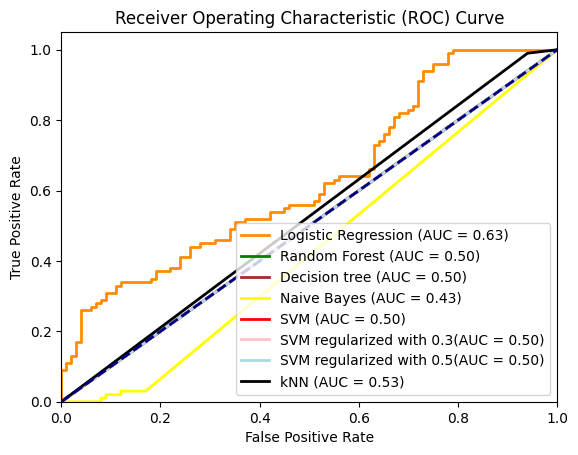

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with 0.3(AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with 0.5(AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## ***Entropy***

**Real Data**

In [ ]:

dataset_ent = []
create_dataset(real_path_patient, dataset_ent, shannonentropy, 1)
create_dataset(real_path_normal, dataset_ent, shannonentropy, 0)


dataset_ent = np.asarray(dataset_ent)
print(dataset_ent[0], '\n', dataset_ent.shape)
# np.save(r'training_data_MLProject\ent_real_only.npy', dataset_ent)



100%|██████████| 100/100 [00:00<00:00, 612.54it/s]

[0.76668816 1.09006723 1.13542262 1.17316075 1.43162449 1.21467035
 1.85055027 1.41485594 0.93910067 1.29247874 1.24487941 1.07497752
 1.4425399  1.3763802  2.22537025 1.6004043  0.99384882 0.90549997
 1.13797102 1.        ] 
 (200, 20)


**Generated Data**

In [ ]:
use_existing = False

In [ ]:

generated_ent = []
create_dataset(gen_path_patient, generated_ent, shannonentropy, 1)
create_dataset(gen_path_normal, generated_ent, shannonentropy, 0)


generated_ent = np.asarray(generated_ent)
print(generated_ent[0], '\n', generated_ent.shape)




100%|██████████| 2000/2000 [00:03<00:00, 573.16it/s]

[-14.03089435 -10.14823907  -6.90236148  -2.49420571  -3.7689803
 -10.53666057 -18.75119475 -12.24074027  -9.71895096  -9.54190838
  -4.46984613  -2.54276873  -2.2367771   -8.64599391 -20.21746275
 -11.88365457  -3.68190719  -2.88807912  -2.02180398   1.        ] 
 (4000, 20)


In [ ]:
# # Extract features (X) and output variable (y)
# X1 = dataset_ent[:, :-1]
# y1 = dataset_ent[:, -1]

# # Split the data into training and testing sets
# X_train_ent, X_test_ent = X1[train_indices], X1[test_indices]
# y_train_ent, y_test_ent = y1[train_indices], y1[test_indices]
X_train_ent, y_train_ent = generated_ent[:, :-1], generated_ent[:, -1]
X_test_ent, y_test_ent = dataset_ent[:, :-1], dataset_ent[:, -1]

In [ ]:
X_train_ent.shape, y_train_ent.shape, X_test_ent.shape, y_test_ent.shape

((4000, 19), (4000,), (200, 19), (200,))

### Random Forest

In [ ]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.8605
Training Precision: 0.845
Training Recall: 0.8720330237358102
Training F1: 0.8583037074657186
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


**Feature Importances**

In [ ]:
ent_rf_classifier.feature_importances_

array([0.04439485, 0.02507259, 0.02666069, 0.10749517, 0.09700043,
       0.07210897, 0.03720615, 0.01933821, 0.20962619, 0.02016442,
       0.07313488, 0.07221101, 0.0228816 , 0.0435179 , 0.01347856,
       0.026992  , 0.02560574, 0.04096873, 0.0221419 ])

### Feature Selection

In [ ]:
print(features_importance := ent_rf_classifier.feature_importances_)

# Threshold
threshold = 0.0

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

[0.04439485 0.02507259 0.02666069 0.10749517 0.09700043 0.07210897
 0.03720615 0.01933821 0.20962619 0.02016442 0.07313488 0.07221101
 0.0228816  0.0435179  0.01347856 0.026992   0.02560574 0.04096873
 0.0221419 ]


In [ ]:
print(indexes)
# X_train_ent, X_test_ent = X_train_ent[:, indexes], X_test_ent[:, indexes]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


### Random Forest Classifier

In [ ]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.865
Training Precision: 0.8535
Training Recall: 0.8735926305015353
Training F1: 0.8634294385432474
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Logistic Regression

In [ ]:
# Initialize the Logistic Regression Classifier
ent_lr_classifier = LogisticRegression()

# Train the classifier on the training data
# ent_lr_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_lr_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

LogisticRegression()
Training Accuracy: 0.843
Training Precision: 0.86
Training Recall: 0.8317214700193424
Training F1: 0.8456243854473943
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [ ]:
# Initialize the Decision Tree Classifier
ent_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# ent_dt_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_dt_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Naive Bayes

In [ ]:
# Initialize the Naïve Bayes Classifier
ent_nb_classifier = GaussianNB()

# Train the classifier on the training data
# ent_nb_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_nb_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

GaussianNB()
Training Accuracy: 0.603
Training Precision: 0.841
Training Recall: 0.5697831978319783
Training F1: 0.6793214862681745
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### SVM

In [ ]:
ent_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(ent_poly_kernel_svm_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.925
Training Precision: 0.9345
Training Recall: 0.9170755642787046
Training F1: 0.9257057949479941
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


In [ ]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.90925
Training Precision: 0.926
Training Recall: 0.895984518626028
Training F1: 0.9107450208999263
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


In [ ]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized2, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.91575
Training Precision: 0.9305
Training Recall: 0.9038368139873725
Training F1: 0.9169746242916975
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### K Nearest Neighbors

In [ ]:
ent_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=7))
    ])

fit_and_print(ent_knn_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=7))])
Training Accuracy: 0.936
Training Precision: 0.927
Training Recall: 0.9439918533604889
Training F1: 0.9354187689202825
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


In [ ]:
#should add all the models reference here
ent_voting_clf = VotingClassifier(
    estimators=[('lr', ent_lr_classifier),('rf', ent_rf_classifier), ('dt',ent_dt_classifier), ('nb', ent_nb_classifier),('svm', ent_poly_kernel_svm_clf), ('svc', ent_poly_kernel_svm_clf_regularized), ('svc2', ent_poly_kernel_svm_clf_regularized2), ('knn', ent_knn_clf)],
    voting='soft')

fit_and_print(ent_voting_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
ent_lr_probs = ent_lr_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_lr, ent_tpr_lr, _ = roc_curve(y_test_ent, ent_lr_probs)

# Calculate AUC
ent_roc_auc_lr = auc(ent_fpr_lr, ent_tpr_lr)


# Get predicted probabilities for the positive class
ent_rf_probs = ent_rf_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_rf, ent_tpr_rf, _ = roc_curve(y_test_ent, ent_rf_probs)

# Calculate AUC
ent_roc_auc_rf = auc(ent_fpr_rf, ent_tpr_rf)


# Get predicted probabilities for the positive class
ent_dt_probs = ent_dt_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_dt, ent_tpr_dt, _ = roc_curve(y_test_ent, ent_dt_probs)

# Calculate AUC
ent_roc_auc_dt = auc(ent_fpr_dt, ent_tpr_dt)


# Get predicted probabilities for the positive class
ent_nb_probs = ent_nb_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_nb, ent_tpr_nb, _ = roc_curve(y_test_ent, ent_nb_probs)

# Calculate AUC
ent_roc_auc_nb = auc(ent_fpr_nb, ent_tpr_nb)



# Get predicted probabilities for the positive class
ent_svm_probs = ent_poly_kernel_svm_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm, ent_tpr_svm, _ = roc_curve(y_test_ent, ent_svm_probs)

# Calculate AUC
ent_roc_auc_svm = auc(ent_fpr_svm, ent_tpr_svm)




# Get predicted probabilities for the positive class
ent_svm_probs2 = ent_poly_kernel_svm_clf_regularized2.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm2, ent_tpr_svm2, _ = roc_curve(y_test_ent, ent_svm_probs2)

# Calculate AUC
ent_roc_auc_svm2 = auc(ent_fpr_svm2, ent_tpr_svm2)




# Get predicted probabilities for the positive class
ent_svm_probs3 = ent_poly_kernel_svm_clf_regularized.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm3, ent_tpr_svm3, _ = roc_curve(y_test_ent, ent_svm_probs3)

# Calculate AUC
ent_roc_auc_svm3 = auc(ent_fpr_svm3, ent_tpr_svm3)



# Get predicted probabilities for the positive class
ent_knn_probs = ent_knn_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_knn, ent_tpr_knn, _ = roc_curve(y_test_ent, ent_knn_probs)

# Calculate AUC
ent_roc_auc_knn = auc(ent_fpr_knn, ent_tpr_knn)


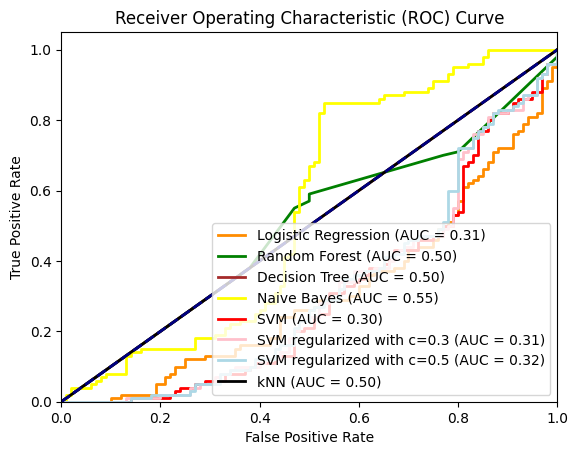

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(ent_fpr_lr, ent_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % ent_roc_auc_lr)
plt.plot(ent_fpr_rf, ent_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % ent_roc_auc_rf)
plt.plot(ent_fpr_dt, ent_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % ent_roc_auc_dt)
plt.plot(ent_fpr_nb, ent_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % ent_roc_auc_nb)
plt.plot(ent_fpr_svm, ent_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % ent_roc_auc_svm)
plt.plot(ent_fpr_svm2, ent_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3 (AUC = %0.2f)' % ent_roc_auc_svm2)
plt.plot(ent_fpr_svm3, ent_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % ent_roc_auc_svm3)
plt.plot(ent_fpr_knn, ent_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % ent_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Kats Fractal Dimension

**Real Dataset**

In [ ]:
use_existing = False

In [ ]:
dataset_kfd = []
create_dataset(real_path_patient, dataset_kfd, katz_fd, 1)
create_dataset(real_path_normal, dataset_kfd, katz_fd, 0)


dataset_kfd = np.asarray(dataset_kfd)
print(dataset_kfd[0], '\n', dataset_kfd.shape) 

100%|██████████| 100/100 [00:00<00:00, 5711.98it/s]

[1.03966185 1.04209544 1.04464989 1.03016303 1.03367448 1.05718889
 1.06888089 1.05493125 1.0389572  1.04352585 1.04043252 1.03256741
 1.02338313 1.06736494 1.09095689 1.04592112 1.03115872 1.0328437
 1.03895552 1.        ] 
 (200, 20)


**Generated Data**

In [ ]:
generated_kfd = []
create_dataset(gen_path_patient, generated_kfd, katz_fd, 1)
create_dataset(gen_path_normal, generated_kfd, katz_fd, 0)


generated_kfd = np.asarray(generated_kfd)
print(generated_kfd[0], '\n', generated_kfd.shape)

100%|██████████| 2000/2000 [00:00<00:00, 6223.35it/s]

[2.36385815 2.21252332 2.05908653 1.91735942 2.02854917 2.1665149
 2.20573339 2.2174461  2.17730025 2.13072053 1.98763353 1.88632343
 1.90759248 2.20171945 2.23839776 2.20720405 2.04232289 1.90686669
 1.84899113 1.        ] 
 (4000, 20)


In [ ]:
print("Dataset: ", dataset_kfd.min(), dataset_kfd.max(), dataset_kfd.mean(), dataset_kfd.std(), 
      "\nGenerated:", generated_kfd.min(), generated_kfd.max(), generated_kfd.mean(), generated_kfd.std())

Dataset:  0.0 1.1215560903410835 1.0071083504281007 0.16240155129628436 
Generated: 0.0 5.900673791594182 2.457003254711471 0.686404194550238


In [ ]:
X_train_kfd, y_train_kfd = generated_kfd[:, :-1], generated_kfd[:, -1]
X_test_kfd, y_test_kfd = dataset_kfd[:, :-1], dataset_kfd[:, -1]

In [ ]:
# X2 = dataset_kfd[:, :-1]
# y2 = dataset_kfd[:, -1]

# num_samples = len(y2)
# train_size = int(0.8 * num_samples)  # 80% for training, 20% for testing

# # Randomly select indices for training and testing
# indices = np.arange(num_samples)
# np.random.shuffle(indices)

# train_indices = indices[:train_size]
# test_indices = indices[train_size:]
# # Extract features (X) and output variable (y)

# # Split the data into training and testing sets
# X_train_kfd, X_test_kfd = X2[train_indices], X2[test_indices]
# y_train_kfd, y_test_kfd = y2[train_indices], y2[test_indices]


### Random Forest 

In [ ]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.7895
Training Precision: 0.842
Training Recall: 0.7619909502262443
Training F1: 0.8
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Feature Selection

In [ ]:
print(features_importance := kfd_rf_classifier.feature_importances_)

[0.02354025 0.02010309 0.02192681 0.11764208 0.0871326  0.11115501
 0.05390277 0.04062145 0.1951898  0.06608935 0.0499533  0.06971978
 0.01189324 0.05177757 0.01689324 0.00981014 0.01253593 0.02261949
 0.01749411]


In [ ]:
# values = [0.05, 0.2, 0.1, 0.15, -0.3, 0.5, 0.05]

# Threshold
threshold = 0.1

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

In [ ]:
indexes

[3, 5, 8]

In [ ]:
# X_train_kfd, X_test_kfd = X_train_kfd[:, indexes], X_test_kfd[:, indexes]

### Random Forest Classifier

In [ ]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.782
Training Precision: 0.8295
Training Recall: 0.7575342465753425
Training F1: 0.7918854415274463
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Logistic Regression

In [ ]:
# Initialize the Logistic Regression Classifier
kfd_lr_classifier = LogisticRegression()

# Train the classifier on the  training data
kfd_lr_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_lr_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

LogisticRegression()
Training Accuracy: 0.86125
Training Precision: 0.876
Training Recall: 0.8508984944147644
Training F1: 0.8632668144863267
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

### Decision Tree

In [ ]:
# Initialize the Decision Tree Classifier
kfd_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# kfd_dt_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_dt_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Naive Bayes

In [ ]:
# Initialize the Naïve Bayes Classifier
kfd_nb_classifier = GaussianNB()

# Train the classifier on the training data
# kfd_nb_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_nb_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

GaussianNB()
Training Accuracy: 0.5575
Training Precision: 0.7845
Training Recall: 0.5395460797799174
Training F1: 0.6393643031784841
Test Accuracy: 0.5
Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVM

In [ ]:
kfd_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(kfd_poly_kernel_svm_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.90375
Training Precision: 0.9135
Training Recall: 0.8960274644433546
Training F1: 0.9046793760831889
Test Accuracy: 0.6
Test Precision: 0.28
Test Recall: 0.7777777777777778
Test F1: 0.4117647058823529


In [ ]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.8945
Training Precision: 0.91
Training Recall: 0.8826382153249273
Training F1: 0.896110290497292
Test Accuracy: 0.51
Test Precision: 1.0
Test Recall: 0.5050505050505051
Test F1: 0.6711409395973155


In [ ]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized2, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.89925
Training Precision: 0.909
Training Recall: 0.8916135360470819
Training F1: 0.9002228274325328
Test Accuracy: 0.535
Test Precision: 1.0
Test Recall: 0.5181347150259067
Test F1: 0.6825938566552902


### K Nearest Neighbors

In [ ]:
kfd_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(kfd_knn_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.92225
Training Precision: 0.9165
Training Recall: 0.9271623672230652
Training F1: 0.9218003520241388
Test Accuracy: 0.5
Test Precision: 1.0
Test Recall: 0.5
Test F1: 0.6666666666666666


### Ensemble

In [ ]:
# fill all the models here
kfd_voting_clf = VotingClassifier(
    estimators=[('lr', kfd_lr_classifier),('rf', kfd_rf_classifier), ('dt',kfd_dt_classifier), ('nb', kfd_nb_classifier),('svm', kfd_poly_kernel_svm_clf), ('svc', kfd_poly_kernel_svm_clf_regularized), ('svc2', kfd_poly_kernel_svm_clf_regularized2), ('knn', kfd_knn_clf)],
    voting='soft')

fit_and_print(kfd_voting_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
kfd_lr_probs = kfd_lr_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_lr, kfd_tpr_lr, _ = roc_curve(y_test_kfd, kfd_lr_probs)

# Calculate AUC
kfd_roc_auc_lr = auc(kfd_fpr_lr, kfd_tpr_lr)



# Get predicted probabilities for the positive class
kfd_rf_probs = kfd_rf_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_rf, kfd_tpr_rf, _ = roc_curve(y_test_kfd, kfd_rf_probs)

# Calculate AUC
kfd_roc_auc_rf = auc(kfd_fpr_rf, kfd_tpr_rf)


# Get predicted probabilities for the positive class
kfd_dt_probs = kfd_dt_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_dt, kfd_tpr_dt, _ = roc_curve(y_test_kfd, kfd_dt_probs)

# Calculate AUC
kfd_roc_auc_dt = auc(kfd_fpr_dt, kfd_tpr_dt)


# Get predicted probabilities for the positive class
kfd_nb_probs = kfd_nb_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_nb, kfd_tpr_nb, _ = roc_curve(y_test_kfd, kfd_nb_probs)

# Calculate AUC
kfd_roc_auc_nb = auc(kfd_fpr_nb, kfd_tpr_nb)



# Get predicted probabilities for the positive class
kfd_svm_probs = kfd_poly_kernel_svm_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm, kfd_tpr_svm, _ = roc_curve(y_test_kfd, kfd_svm_probs)

# Calculate AUC
kfd_roc_auc_svm = auc(kfd_fpr_svm, kfd_tpr_svm)




# Get predicted probabilities for the positive class
kfd_svm_probs2 = kfd_poly_kernel_svm_clf_regularized.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm2, kfd_tpr_svm2, _ = roc_curve(y_test_kfd, kfd_svm_probs2)

# Calculate AUC
kfd_roc_auc_svm2 = auc(kfd_fpr_svm2, kfd_tpr_svm2)




# Get predicted probabilities for the positive class
kfd_svm_probs3 = kfd_poly_kernel_svm_clf_regularized2.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm3, kfd_tpr_svm3, _ = roc_curve(y_test_kfd, kfd_svm_probs3)

# Calculate AUC
kfd_roc_auc_svm3 = auc(kfd_fpr_svm3, kfd_tpr_svm3)



# Get predicted probabilities for the positive class
kfd_knn_probs = kfd_knn_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_knn, kfd_tpr_knn, _ = roc_curve(y_test_kfd, kfd_knn_probs)

# Calculate AUC
kfd_roc_auc_knn = auc(kfd_fpr_knn, kfd_tpr_knn)


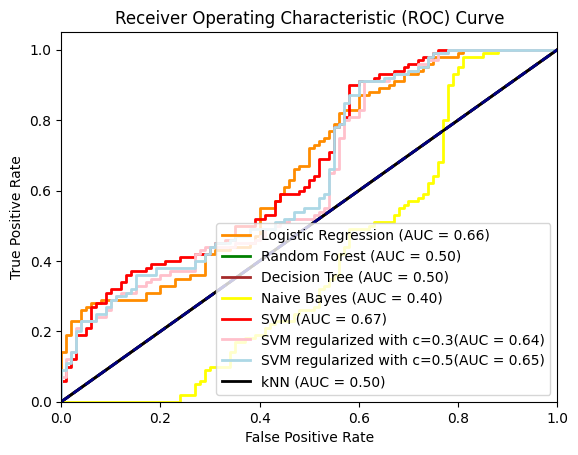

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(kfd_fpr_lr, kfd_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % kfd_roc_auc_lr)
plt.plot(kfd_fpr_rf, kfd_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % kfd_roc_auc_rf)
plt.plot(kfd_fpr_dt, kfd_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % kfd_roc_auc_dt)
plt.plot(kfd_fpr_nb, kfd_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % kfd_roc_auc_nb)
plt.plot(kfd_fpr_svm, kfd_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % kfd_roc_auc_svm)
plt.plot(kfd_fpr_svm2, kfd_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3(AUC = %0.2f)' % kfd_roc_auc_svm2)
plt.plot(kfd_fpr_svm3, kfd_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5(AUC = %0.2f)' % kfd_roc_auc_svm3)
plt.plot(kfd_fpr_knn, kfd_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % kfd_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# EEGNet

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
import os

In [ ]:
batch_size = 32

In [ ]:
training_data_control_np = np.load(gen_path_normal)
training_data_patient_np = np.load(gen_path_patient)

labels_control = np.zeros(training_data_control_np.shape[0])  # Label for controls is 0
labels_patient = np.ones(training_data_patient_np.shape[0])   # Label for patients is 1


training_data_np = np.concatenate((training_data_control_np,training_data_patient_np), axis=0)
labels_np = np.concatenate((labels_control, labels_patient), axis=0)

data_tensor = torch.Tensor(training_data_np)
labels_tensor = torch.LongTensor(labels_np)  # Use LongTensor for labels

# Since the discriminator expects flat input, flatten the data if necessary
data_tensor = data_tensor.view(data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
dataset = TensorDataset(data_tensor, labels_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [ ]:
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)

val_labels_control = np.zeros(real_data_control.shape[0])  # Label for controls is 0
val_labels_patient = np.ones(real_data_patient.shape[0])   # Label for patients is 1

validation_data_np = np.concatenate((real_data_control,real_data_patient), axis=0)
val_labels_np = np.concatenate((val_labels_control, val_labels_patient), axis=0)

validation_data_tensor = torch.Tensor(validation_data_np)
val_tensor = torch.LongTensor(val_labels_np) #, dtype=torch.float32) #.dtype(torch.float) 

# Since the discriminator expects flat input, flatten the data if necessary
validation_data_tensor = validation_data_tensor.view(validation_data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
validation_dataset = TensorDataset(validation_data_tensor, val_tensor)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
validation_data_np.shape,val_labels_np.shape

((200, 19, 500), (200,))

In [ ]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from modules.EEGNET import EEGNetClassifier

test_validity = False

if not test_validity:
    model = EEGNetClassifier().cuda()
else:
    class SimpleNet(nn.Module):
        def __init__(self, input_channels=1, num_classes=1):
            super(SimpleNet, self).__init__()
            self.conv1 = nn.Conv2d(input_channels, 1, kernel_size=3, stride=1, padding=1)
            self.relu = nn.ReLU()
            self.fc = nn.Linear(9500, num_classes)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            # Input x should have shape: (batch_size, input_channels, sequence_length)
            x = self.conv1(x)
            x = self.relu(x)
            # Flatten before fully connected layer
            x = x.view(x.size(0), -1)
            x = self.fc(x)
            x = self.sigmoid(x)
            return x
    model = SimpleNet().cuda()

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 25 

In [ ]:
from tqdm import tqdm

for epoch in (range(num_epochs)):
    pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    model.train()
    for batch, labels in pbar:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())

        pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")
    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Val Loss: {sum(val_losses)/len(val_losses)} Val Accuracy: {val_accuracy}\033[0m")
            

Epoch 0 Loss: 0.0694323182106018 : 100%|██████████| 125/125 [00:00<00:00, 213.81it/s]  


Epoch 0 Training Loss: 0.2925652317255735 Val Loss: 13.878136362348284 Val Accuracy: 0.585


Epoch 1 Loss: 0.03564085811376572 : 100%|██████████| 125/125 [00:00<00:00, 336.86it/s] 


Epoch 1 Training Loss: 0.026691021718084813 Val Loss: 11.28240258353097 Val Accuracy: 0.51


Epoch 2 Loss: 0.01962086744606495 : 100%|██████████| 125/125 [00:00<00:00, 335.61it/s]  


Epoch 2 Training Loss: 0.014598400522489102 Val Loss: 11.426195536340986 Val Accuracy: 0.545


Epoch 3 Loss: 0.001843731151893735 : 100%|██████████| 125/125 [00:00<00:00, 340.06it/s] 


Epoch 3 Training Loss: 0.007130334072746336 Val Loss: 16.255957467215403 Val Accuracy: 0.465


Epoch 4 Loss: 0.0018015237292274833 : 100%|██████████| 125/125 [00:00<00:00, 336.98it/s]


Epoch 4 Training Loss: 0.008830153114511631 Val Loss: 24.647184371948242 Val Accuracy: 0.475


Epoch 5 Loss: 0.002851861296221614 : 100%|██████████| 125/125 [00:00<00:00, 328.14it/s] 


Epoch 5 Training Loss: 0.005049512325320393 Val Loss: 23.68856293814523 Val Accuracy: 0.475


Epoch 6 Loss: 0.0004611545882653445 : 100%|██████████| 125/125 [00:00<00:00, 338.07it/s] 


Epoch 6 Training Loss: 0.004544011633377522 Val Loss: 27.81520652770996 Val Accuracy: 0.48


Epoch 7 Loss: 0.0010622768895700574 : 100%|██████████| 125/125 [00:00<00:00, 339.72it/s] 


Epoch 7 Training Loss: 0.0059395451485761445 Val Loss: 15.66914449419294 Val Accuracy: 0.46


Epoch 8 Loss: 0.0001537675125291571 : 100%|██████████| 125/125 [00:00<00:00, 330.18it/s] 


Epoch 8 Training Loss: 0.0064375140435877255 Val Loss: 19.93349061693464 Val Accuracy: 0.45


Epoch 9 Loss: 0.0017242978792637587 : 100%|██████████| 125/125 [00:00<00:00, 336.51it/s] 


Epoch 9 Training Loss: 0.002961704033266869 Val Loss: 27.31991250174386 Val Accuracy: 0.46


Epoch 10 Loss: 0.009405935183167458 : 100%|██████████| 125/125 [00:00<00:00, 332.49it/s]  


Epoch 10 Training Loss: 0.004060443112277426 Val Loss: 35.15994044712612 Val Accuracy: 0.48


Epoch 11 Loss: 0.007470579817891121 : 100%|██████████| 125/125 [00:00<00:00, 330.74it/s]  


Epoch 11 Training Loss: 0.002718628448943491 Val Loss: 43.13549559456961 Val Accuracy: 0.49


Epoch 12 Loss: 0.00012986481306143105 : 100%|██████████| 125/125 [00:00<00:00, 335.51it/s]


Epoch 12 Training Loss: 0.0020905548302689566 Val Loss: 47.04127720424107 Val Accuracy: 0.5


Epoch 13 Loss: 0.001524265855550766 : 100%|██████████| 125/125 [00:00<00:00, 336.40it/s]  


Epoch 13 Training Loss: 0.0019335089118903853 Val Loss: 43.49131120954241 Val Accuracy: 0.49


Epoch 14 Loss: 5.508022877620533e-05 : 100%|██████████| 125/125 [00:00<00:00, 338.78it/s] 


Epoch 14 Training Loss: 0.0032544942214772165 Val Loss: 32.49522399902344 Val Accuracy: 0.46


Epoch 15 Loss: 5.895592039451003e-05 : 100%|██████████| 125/125 [00:00<00:00, 320.98it/s]


Epoch 15 Training Loss: 0.002726824587181909 Val Loss: 19.31312738146101 Val Accuracy: 0.47


Epoch 16 Loss: 0.004992869682610035 : 100%|██████████| 125/125 [00:00<00:00, 329.13it/s]  


Epoch 16 Training Loss: 0.004190936063881963 Val Loss: 25.7409245627267 Val Accuracy: 0.465


Epoch 17 Loss: 0.0011875283671543002 : 100%|██████████| 125/125 [00:00<00:00, 337.45it/s] 


Epoch 17 Training Loss: 0.0028961494593750105 Val Loss: 20.992396354675293 Val Accuracy: 0.555


Epoch 18 Loss: 5.517891622730531e-05 : 100%|██████████| 125/125 [00:00<00:00, 319.75it/s]


Epoch 18 Training Loss: 0.0022428083464692463 Val Loss: 40.193189893450054 Val Accuracy: 0.48


Epoch 19 Loss: 3.242848106310703e-05 : 100%|██████████| 125/125 [00:00<00:00, 339.76it/s] 


Epoch 19 Training Loss: 0.0014423113414668478 Val Loss: 38.51311220441546 Val Accuracy: 0.47


Epoch 20 Loss: 1.6182049876078963e-05 : 100%|██████████| 125/125 [00:00<00:00, 340.21it/s]


Epoch 20 Training Loss: 0.0014247815847284074 Val Loss: 41.12259129115513 Val Accuracy: 0.485


Epoch 21 Loss: 0.00010907239629887044 : 100%|██████████| 125/125 [00:00<00:00, 341.14it/s]


Epoch 21 Training Loss: 0.0012818424653505646 Val Loss: 44.60006359645298 Val Accuracy: 0.485


Epoch 22 Loss: 8.961130333773326e-06 : 100%|██████████| 125/125 [00:00<00:00, 336.35it/s] 


Epoch 22 Training Loss: 0.0012884980169346819 Val Loss: 26.22582926068987 Val Accuracy: 0.525


Epoch 23 Loss: 0.002094977768138051 : 100%|██████████| 125/125 [00:00<00:00, 328.95it/s]  


Epoch 23 Training Loss: 0.0028506340077892674 Val Loss: 47.32142857142857 Val Accuracy: 0.5


Epoch 24 Loss: 7.242480933200568e-05 : 100%|██████████| 125/125 [00:00<00:00, 335.14it/s] 


Epoch 24 Training Loss: 0.001320854843415873 Val Loss: 48.660714285714285 Val Accuracy: 0.5


# EEGNet Real and Gen Discrimination

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split

In [ ]:
batch_size = 32

In [ ]:
##
# Load Generated data and combine it
## 
gen_data_control_np = np.load(gen_path_normal)
gen_data_patient_np = np.load(gen_path_patient)
gen_data_np = np.concatenate((gen_data_control_np, gen_data_patient_np), axis=0)
gen_labels = np.zeros(gen_data_np.shape[0])  # Label for controls is 0

##
# Load real data and combine it
##
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)
real_data_np = np.concatenate((real_data_control, real_data_patient), axis=0)
real_labels = np.ones(real_data_np.shape[0])   # Label for patients is 1

# combine real and generated data
dataset = np.concatenate((gen_data_np,real_data_np), axis=0)
labels_dataset = np.concatenate((gen_labels,real_labels), axis=0)

train_data, val_data, train_labels, val_labels = train_test_split(
    dataset, labels_dataset, test_size=0.2, random_state=42, stratify=labels_dataset
)

# Convert data to tensors
train_data_tensor = torch.Tensor(train_data)
train_labels_tensor = torch.LongTensor(train_labels)
val_data_tensor = torch.Tensor(val_data)
val_labels_tensor = torch.LongTensor(val_labels)

# Reshape to the expected input format
train_data_tensor = train_data_tensor.view(train_data_tensor.size(0), 1, 19, 500)
val_data_tensor = val_data_tensor.view(val_data_tensor.size(0), 1, 19, 500)

# Create TensorDatasets
train_tensor_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
val_tensor_dataset = TensorDataset(val_data_tensor, val_labels_tensor)

# Create DataLoaders
batch_size = 32  # Example batch size; modify as needed
train_loader = DataLoader(train_tensor_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_tensor_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from modules.EEGNET import EEGNetClassifier
model = EEGNetClassifier().cuda()

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 5

In [ ]:
from tqdm import tqdm

for epoch in (range(num_epochs)):
    pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    correct = 0
    total = 0
    for batch, labels in pbar:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        pred_calc = (predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
        correct += (pred_calc == labels.int()).sum().item()
        total += labels.size(0)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())
        # val_losses.append(val_loss.item())
        pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")

    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    accuracy = correct / total if total > 0 else 0.0
    print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Validation Loss: {sum(val_losses)/len(val_losses)} Training Accuracy: {accuracy} Validation Accuracy: {val_accuracy}\033[0m")

Epoch 0 Loss: 0.1079581156373024 : 100%|██████████| 105/105 [00:00<00:00, 287.90it/s] 


Epoch 0 Training Loss: 0.24959856443816708 Validation Loss: 0.14061451479102727 Training Accuracy: 0.9452380952380952 Validation Accuracy: 0.9523809523809523


Epoch 1 Loss: 0.009933711029589176 : 100%|██████████| 105/105 [00:00<00:00, 323.16it/s]


Epoch 1 Training Loss: 0.07194316788975681 Validation Loss: 0.034906461420986384 Training Accuracy: 0.96875 Validation Accuracy: 0.986904761904762


Epoch 2 Loss: 0.003455528523772955 : 100%|██████████| 105/105 [00:00<00:00, 323.51it/s] 


Epoch 2 Training Loss: 0.0177849454938301 Validation Loss: 0.014089204888376925 Training Accuracy: 0.993452380952381 Validation Accuracy: 0.9928571428571429


Epoch 3 Loss: 0.0018438866827636957 : 100%|██████████| 105/105 [00:00<00:00, 330.27it/s]


Epoch 3 Training Loss: 0.006911704049534386 Validation Loss: 0.007244180016978471 Training Accuracy: 0.9982142857142857 Validation Accuracy: 0.9952380952380953


Epoch 4 Loss: 0.008020722307264805 : 100%|██████████| 105/105 [00:00<00:00, 325.06it/s]

Epoch 4 Training Loss: 0.003425973766328146 Validation Loss: 0.004756902150499324 Training Accuracy: 1.0 Validation Accuracy: 0.9988095238095238
